Análise Descritiva - Tech Challenge 1 Grupo 87

Análise Descritiva do setor vinícola brasileiro a partir dos dados disponíveis

Autor: Luís Filipe Ginane Mayer dos Santos

Grupo: 87

Turma: 11DTAT

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Bases de Dados

In [4]:
# Carregar arquivos para utilização

df_producao = pd.read_csv('Producao.csv', sep=';')
df_comercializacao = pd.read_csv('Comercializacao.csv', sep=';')
df_processamento = pd.read_csv('Processamento.csv', sep=';')
df_exportacao = pd.read_csv('Exportacao.csv', sep=';')
df_importacao = pd.read_csv('Importacao.csv', sep=';')

In [12]:
# Selecionar apenas as colunas numéricas (ignorando 'Id' e 'País')
colunas_numericas = df_exportacao.select_dtypes(include=['int64', 'float64']).drop(columns=['Id'], errors='ignore')

# Verificar se todas as colunas numéricas em uma linha são zero
paises_com_zeros_em_todas_colunas = df_exportacao[
    (colunas_numericas == 0).all(axis=1)
]

# Exibir o nome dos países que se encaixam nesse critério
if not paises_com_zeros_em_todas_colunas.empty:
    print("Países com valor zero em todas as colunas numéricas:")
    display(paises_com_zeros_em_todas_colunas['País'])
else:
    print("Não há países com valor zero em todas as colunas numéricas.")

Não há países com valor zero em todas as colunas numéricas.


In [11]:
# Visualizando os tipos de dados
df_exportacao.dtypes

,0
Id,int64
País,object
1970,int64
1970.1,int64
1971,int64
...,...
2021.1,int64
2022,int64
2022.1,int64
2023,int64



Nomes das colunas originais:
['Id', 'País', '1970', '1970.1', '1971', '1971.1', '1972', '1972.1', '1973', '1973.1', '1974', '1974.1', '1975', '1975.1', '1976', '1976.1', '1977', '1977.1', '1978', '1978.1', '1979', '1979.1', '1980', '1980.1', '1981', '1981.1', '1982', '1982.1', '1983', '1983.1', '1984', '1984.1', '1985', '1985.1', '1986', '1986.1', '1987', '1987.1', '1988', '1988.1', '1989', '1989.1', '1990', '1990.1', '1991', '1991.1', '1992', '1992.1', '1993', '1993.1', '1994', '1994.1', '1995', '1995.1', '1996', '1996.1', '1997', '1997.1', '1998', '1998.1', '1999', '1999.1', '2000', '2000.1', '2001', '2001.1', '2002', '2002.1', '2003', '2003.1', '2004', '2004.1', '2005', '2005.1', '2006', '2006.1', '2007', '2007.1', '2008', '2008.1', '2009', '2009.1', '2010', '2010.1', '2011', '2011.1', '2012', '2012.1', '2013', '2013.1', '2014', '2014.1', '2015', '2015.1', '2016', '2016.1', '2017', '2017.1', '2018', '2018.1', '2019', '2019.1', '2020', '2020.1', '2021', '2021.1', '2022', '2022.1', '

,Id,País,Ano,Quantidade,Valor
0,1,AfeganistÃ£o,1970,0,0
1,2,Ãfrica do Sul,1970,0,0
2,3,"Alemanha, RepÃºblica DemocrÃ¡tica",1970,0,0
3,4,Angola,1970,0,0
4,5,Anguilla,1970,0,0



Colunas após reshaping:
['Id', 'País', 'Ano', 'Quantidade', 'Valor']


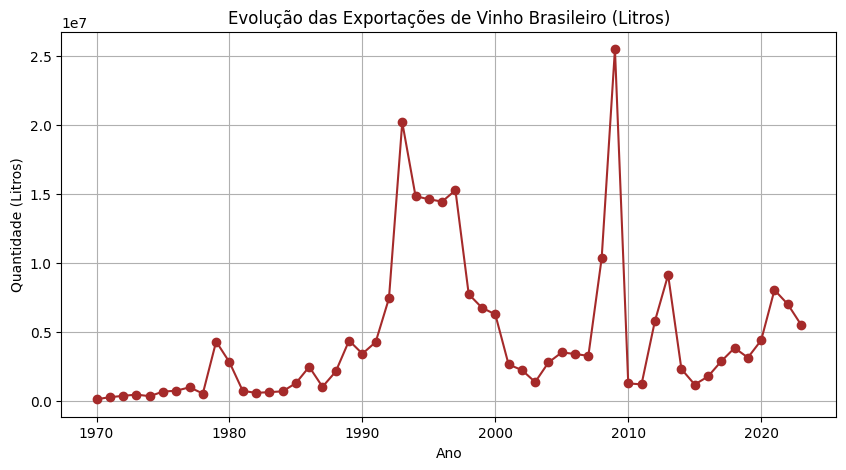

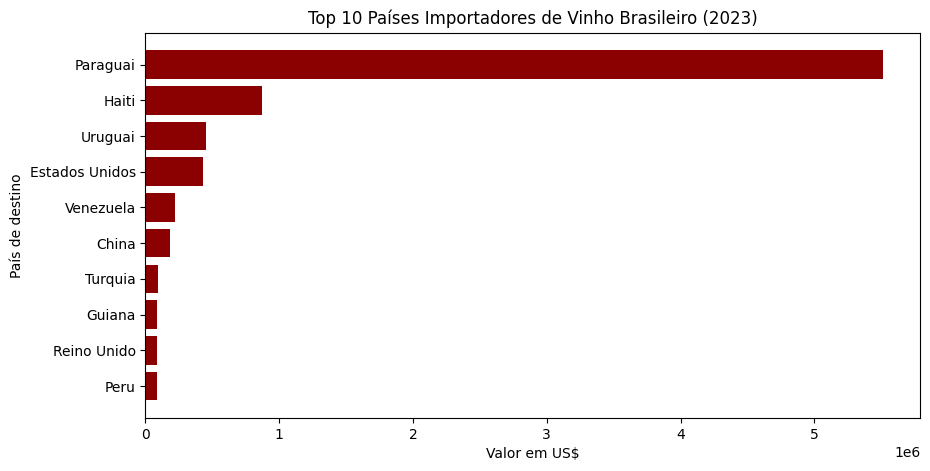


💡 Total exportado (todo o período):
 - Volume total: 254,077,044 litros
 - Valor total:  US$ 251,219,055.00


In [10]:
# Análise da base de exportação de vinhos

import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 1️⃣ Ler o arquivo CSV
# ------------------------------------------------------------


# Tentativa automática de leitura (detecta separador e acentuação)
# Specify the separator as ';' based on the previous successful read
df = pd.read_csv('Exportacao.csv', sep=';', encoding='latin1')

# Rename the column with encoding issue
df.rename(columns={'PaÃ\xads': 'País'}, inplace=True)


# ------------------------------------------------------------
# 2️⃣ Ver nomes das colunas para sabermos o que existe
# ------------------------------------------------------------
print("\nNomes das colunas originais:")
print(df.columns.tolist())


# ------------------------------------------------------------
# 3️⃣ Reshape the DataFrame from wide to long format
# ------------------------------------------------------------
# Get the list of year columns for quantity and value
year_cols_quantity = [col for col in df.columns if col.isdigit()]
year_cols_value = [col for col in df.columns if col.endswith('.1')]

# Melt the DataFrame for quantity and value columns separately
df_quantity = df.melt(id_vars=['Id', 'País'], value_vars=year_cols_quantity, var_name='Ano', value_name='Quantidade')
df_value = df.melt(id_vars=['Id', 'País'], value_vars=year_cols_value, var_name='Ano_value', value_name='Valor')

# Clean up the 'Ano' column in both melted dataframes
df_quantity['Ano'] = df_quantity['Ano'].astype(int)
df_value['Ano_value'] = df_value['Ano_value'].str.replace('.1', '', regex=False).astype(int)

# Merge the two dataframes on 'Id', 'País', and the cleaned 'Ano'/'Ano_value'
df_long = pd.merge(df_quantity, df_value, left_on=['Id', 'País', 'Ano'], right_on=['Id', 'País', 'Ano_value'])

# Drop the redundant 'Ano_value' column
df_long.drop('Ano_value', axis=1, inplace=True)

# Convert 'Quantidade' and 'Valor' to numeric, coercing errors
df_long['Quantidade'] = pd.to_numeric(df_long['Quantidade'], errors='coerce').fillna(0)
df_long['Valor'] = pd.to_numeric(df_long['Valor'], errors='coerce').fillna(0)


# ------------------------------------------------------------
# 4️⃣ Verify the new structure and column names
# ------------------------------------------------------------
print("\nPré-visualização dos dados após reshaping:")
display(df_long.head())

print("\nColunas após reshaping:")
print(df_long.columns.tolist())


# ------------------------------------------------------------
# 5️⃣ Total exportado por ano
# ------------------------------------------------------------
df_ano = df_long.groupby('Ano')[['Quantidade', 'Valor']].sum().reset_index()


# ------------------------------------------------------------
# 6️⃣ Gráfico 1 – Evolução das exportações (litros)
# ------------------------------------------------------------
plt.figure(figsize=(10,5))
plt.plot(df_ano['Ano'], df_ano['Quantidade'], marker='o', color='brown')
plt.title('Evolução das Exportações de Vinho Brasileiro (Litros)')
plt.xlabel('Ano')
plt.ylabel('Quantidade (Litros)')
plt.grid(True)
plt.show()

# ------------------------------------------------------------
# 7️⃣ Gráfico 2 – Top 10 países (último ano)
# ------------------------------------------------------------
ultimo_ano = df_long['Ano'].max()
df_top = df_long[df_long['Ano'] == ultimo_ano].sort_values(by='Valor', ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.barh(df_top['País'], df_top['Valor'], color='darkred') # Use 'País' column
plt.title(f'Top 10 Países Importadores de Vinho Brasileiro ({ultimo_ano})')
plt.xlabel('Valor em US$')
plt.ylabel('País de destino')
plt.gca().invert_yaxis()  # deixa o país com maior valor no topo
plt.show()

# ------------------------------------------------------------
# 8️⃣ Totais gerais
# ------------------------------------------------------------
total_litros = df_long['Quantidade'].sum()
total_valor = df_long['Valor'].sum()

print(f"\n💡 Total exportado (todo o período):")
print(f" - Volume total: {total_litros:,.0f} litros")
print(f" - Valor total:  US$ {total_valor:,.2f}")

✅ Dados prontos para análise!


,País,Ano,Quantidade,Valor
0,Afeganistão,1970,0,0
1,África do Sul,1970,0,0
2,"Alemanha, República Democrática",1970,0,0
3,Angola,1970,0,0
4,Anguilla,1970,0,0


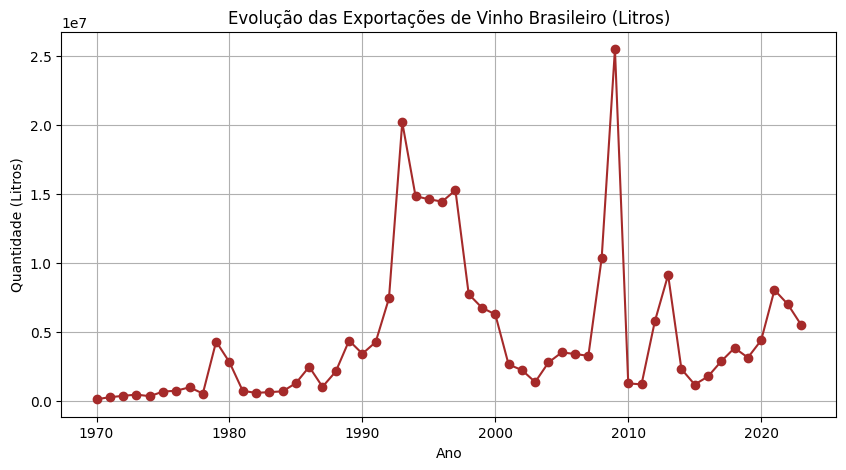

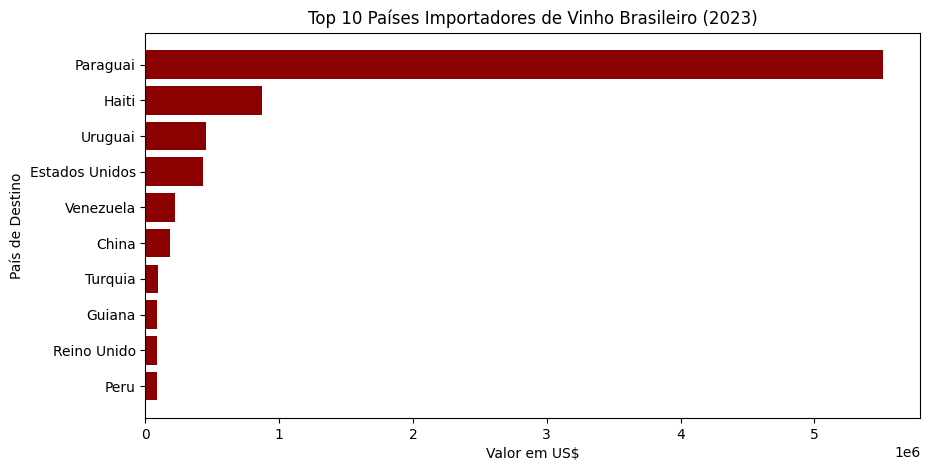


💡 Total exportado nos últimos 15 anos:
 - Volume total: 83,174,997 litros
 - Valor total:  US$ 114,449,292.00


In [16]:
# Análise de exportação de vinhos brasileiros

import pandas as pd
import matplotlib.pyplot as plt

#
# 1️⃣ Leitura do arquivo
# ------------------------------------------------------------
df = pd.read_csv("Exportacao.csv", sep=';')

# RenameRenomeando a coluna para corrigir o erro
df.rename(columns={'PaÃ\xads': 'País'}, inplace=True)

# ------------------------------------------------------------
# 2️⃣ Ajuste de estrutura (de formato largo para formato longo)
# ------------------------------------------------------------
# Cria listas separando colunas de quantidade e de valor
anos = [col for col in df.columns if col.isdigit()]
anos_valor = [col for col in df.columns if col.endswith(".1")]

# Criar um dataframe "long" para quantidades
df_qtd = df.melt(id_vars=["País"], value_vars=anos, var_name="Ano", value_name="Quantidade")

# Criar um dataframe "long" para valores
df_val = df.melt(id_vars=["País"], value_vars=anos_valor, var_name="Ano_val", value_name="Valor")

# Tirar o ".1" do ano dos valores e converter para string para poder juntar
df_val["Ano"] = df_val["Ano_val"].str.replace(".1", "", regex=False)

# Combinar as duas bases (quantidade e valor)
df_final = pd.merge(df_qtd, df_val[["País", "Ano", "Valor"]], on=["País", "Ano"], how="left")

# Converter colunas numéricas
df_final["Ano"] = df_final["Ano"].astype(int)
df_final["Quantidade"] = pd.to_numeric(df_final["Quantidade"], errors="coerce")
df_final["Valor"] = pd.to_numeric(df_final["Valor"], errors="coerce")

# Remover linhas sem dados
df_final.dropna(subset=["Quantidade", "Valor"], inplace=True)

print("✅ Dados prontos para análise!")
display(df_final.head())

# ------------------------------------------------------------
# 3️⃣ Total exportado por ano
# ------------------------------------------------------------
df_ano = df_final.groupby("Ano")[["Quantidade", "Valor"]].sum().reset_index()

# ------------------------------------------------------------
# 4️⃣ Gráfico 1 - Evolução das exportações
# ------------------------------------------------------------
plt.figure(figsize=(10,5))
plt.plot(df_ano["Ano"], df_ano["Quantidade"], marker="o", color="brown")
plt.title("Evolução das Exportações de Vinho Brasileiro (Litros)")
plt.xlabel("Ano")
plt.ylabel("Quantidade (Litros)")
plt.grid(True)
plt.show()

# ------------------------------------------------------------
# 5️⃣ Top 10 países no último ano
# ------------------------------------------------------------
ultimo_ano = df_final["Ano"].max()
df_top = df_final[df_final["Ano"] == ultimo_ano].sort_values(by="Valor", ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.barh(df_top["País"], df_top["Valor"], color="darkred")
plt.title(f"Top 10 Países Importadores de Vinho Brasileiro ({ultimo_ano})")
plt.xlabel("Valor em US$")
plt.ylabel("País de Destino")
plt.gca().invert_yaxis()
plt.show()

# ------------------------------------------------------------
# 6️⃣ Totais gerais (últimos 15 anos)
# ------------------------------------------------------------
anos_recentes = sorted(df_final["Ano"].unique())[-15:]
df_15 = df_final[df_final["Ano"].isin(anos_recentes)]

total_litros = df_15["Quantidade"].sum()
total_valor = df_15["Valor"].sum()

print(f"\n💡 Total exportado nos últimos 15 anos:")
print(f" - Volume total: {total_litros:,.0f} litros")
print(f" - Valor total:  US$ {total_valor:,.2f}")

In [18]:
import pandas as pd

# Carregar a base
df = pd.read_csv("Exportacao.csv", sep=';')

# ------------------------------------------------------------
# 1️⃣ Manter apenas as colunas de 2008 a 2023
# ------------------------------------------------------------
# A estrutura da tabela é assim: "2008", "2008.1", "2009", "2009.1"...
# onde a primeira coluna é a quantidade e a segunda é o valor (US$)

anos = list(range(2008, 2024))
colunas_quantidade = [str(ano) for ano in anos]
colunas_valor = [f"{ano}.1" for ano in anos]

colunas_usar = ["País"] + colunas_quantidade + colunas_valor
df = df[colunas_usar]

# ------------------------------------------------------------
# 2️⃣ Renomear colunas pra algo mais legível
# ------------------------------------------------------------
# Exemplo: '2008' -> 'Quantidade_2008', '2008.1' -> 'Valor_2008'

novos_nomes = {"País": "Pais"}
for ano in anos:
    novos_nomes[str(ano)] = f"Quantidade_{ano}"
    novos_nomes[f"{ano}.1"] = f"Valor_{ano}"

df.rename(columns=novos_nomes, inplace=True)

# ------------------------------------------------------------
# 3️⃣ Conferir o resultado
# ------------------------------------------------------------
print("✅ Dados limpos e prontos para análise!\n")
print(df.head())

print("\n📊 Colunas atuais:")
print(df.columns.tolist())


✅ Dados limpos e prontos para análise!

                              Pais  Quantidade_2008  Quantidade_2009  \
0                      Afeganistão                0                0   
1                    África do Sul                0                0   
2  Alemanha, República Democrática           265742           225086   
3                           Angola            25721            54786   
4                         Anguilla                0                0   

   Quantidade_2010  Quantidade_2011  Quantidade_2012  Quantidade_2013  \
0                0                0                0                0   
1                0                0                0                0   
2            27715            36070             8189            61699   
3            33557            13889             2833             1573   
4                0                0                0                0   

   Quantidade_2014  Quantidade_2015  Quantidade_2016  ...  Valor_2014  \
0              

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------
# 1️⃣ Recarregar a base limpa
# ------------------------------------------
df = pd.read_csv("Exportacao.csv", sep=';')

# Rename the column with encoding issue
df.rename(columns={'PaÃ\xads': 'País'}, inplace=True)

# Selecionar apenas 2008–2023
anos = list(range(2008, 2023))
colunas_quantidade = [str(ano) for ano in anos]
colunas_valor = [f"{ano}.1" for ano in anos]

colunas_usar = ["País"] + colunas_quantidade + colunas_valor
df = df[colunas_usar]

# Renomear colunas
df.rename(columns={"País": "Pais"}, inplace=True)
for ano in anos:
    df.rename(columns={str(ano): f"Quantidade_{ano}", f"{ano}.1": f"Valor_{ano}"}, inplace=True)

# ------------------------------------------
# 2️⃣ Transformar dados de formato largo → longo
# ------------------------------------------
# Exemplo:
# Pais | Quantidade_2008 | Valor_2008 → Ano | Quantidade | Valor

dados_quantidade = df.melt(id_vars="Pais", value_vars=[f"Quantidade_{ano}" for ano in anos],
                           var_name="Ano", value_name="Quantidade")
dados_valor = df.melt(id_vars="Pais", value_vars=[f"Valor_{ano}" for ano in anos],
                      var_name="Ano", value_name="Valor")

# Unificar os dois datasets
dados_quantidade["Ano"] = dados_quantidade["Ano"].str.replace("Quantidade_", "").astype(int)
dados_valor["Ano"] = dados_valor["Ano"].str.replace("Valor_", "").astype(int)

df_final = pd.merge(dados_quantidade, dados_valor, on=["Pais", "Ano"], how="inner")

# ------------------------------------------
# 3️⃣ Limpeza de valores
# ------------------------------------------
df_final["Quantidade"] = pd.to_numeric(df_final["Quantidade"], errors="coerce").fillna(0)
df_final["Valor"] = pd.to_numeric(df_final["Valor"], errors="coerce").fillna(0)

Análise Descritiva

📊 Dimensões do dataset: (2055, 4)

📋 Visão geral:
                              Pais   Ano  Quantidade   Valor
0                      Afeganistão  2008           0       0
1                    África do Sul  2008           0       0
2  Alemanha, República Democrática  2008      265742  429970
3                           Angola  2008       25721   71083
4                         Anguilla  2008           0       0


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


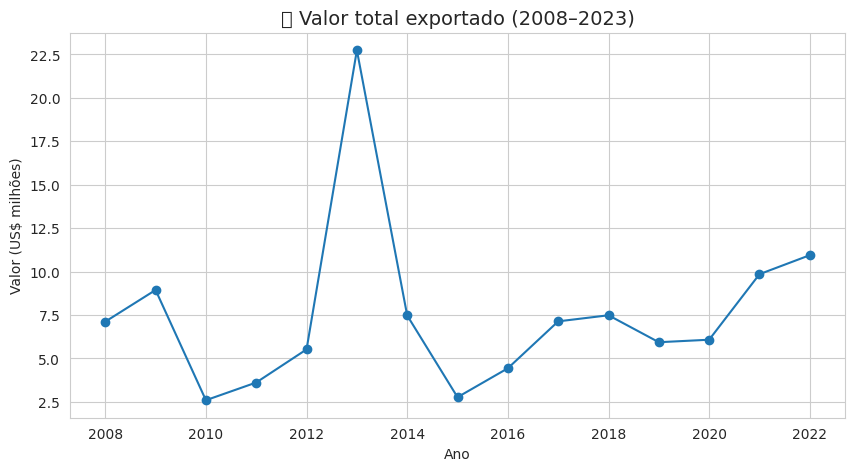

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127863 (\N{WINE GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


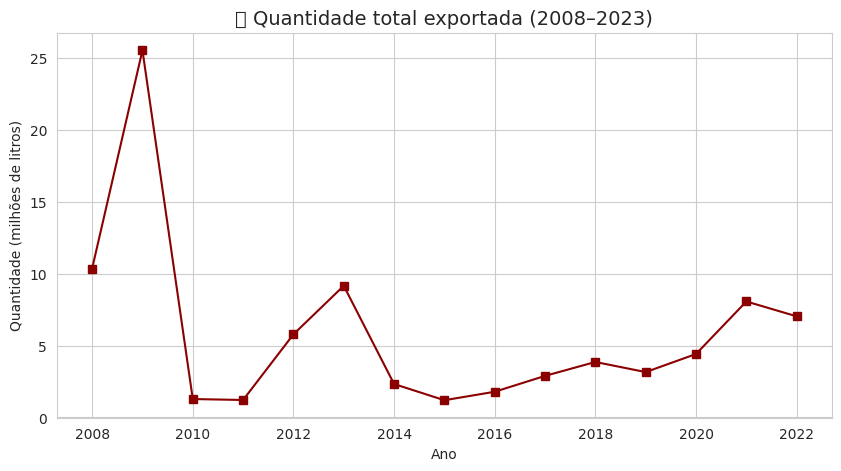

/tmp/ipython-input-3521974229.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_paises, y="Pais", x="Valor", palette="viridis")
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127758 (\N{EARTH GLOBE AMERICAS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


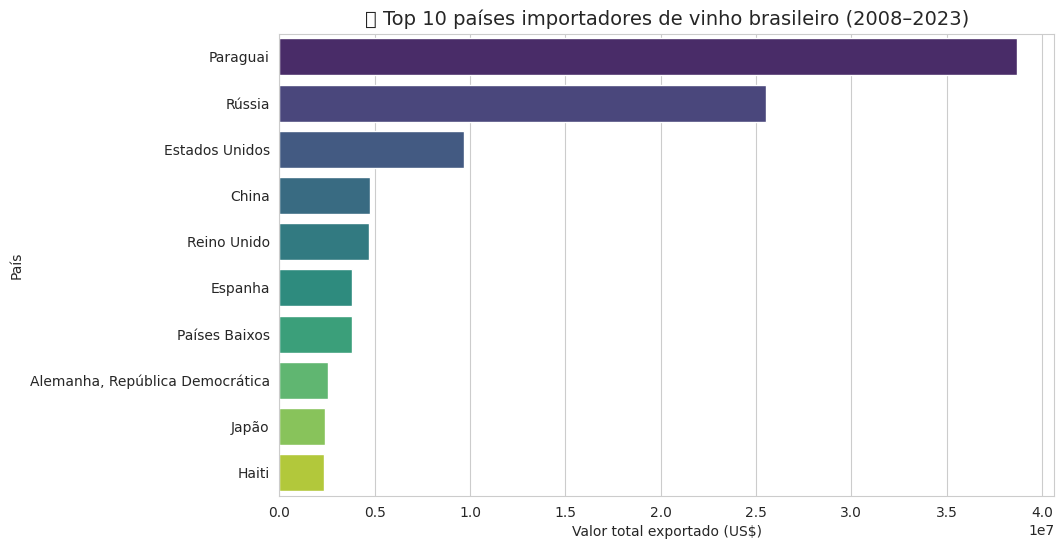

In [25]:
# ------------------------------------------
# 4️⃣ Análise descritiva
# ------------------------------------------

df = pd.read_csv("Exportacao.csv", sep=';')
print("📊 Dimensões do dataset:", df_final.shape)
print("\n📋 Visão geral:")
print(df_final.head())

# Totais por ano
venda_anual = df_final.groupby("Ano")[["Quantidade", "Valor"]].sum().reset_index()

# Top 10 países exportadores no período
top_paises = (
    df_final.groupby("Pais")[["Quantidade", "Valor"]]
    .sum()
    .sort_values("Valor", ascending=False)
    .head(10)
    .reset_index()
)

# ------------------------------------------
# 5️⃣ Visualizações
# ------------------------------------------
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
plt.plot(venda_anual["Ano"], venda_anual["Valor"]/1e6, marker="o")
plt.title("💰 Valor total exportado (2008–2023)", fontsize=14)
plt.ylabel("Valor (US$ milhões)")
plt.xlabel("Ano")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(venda_anual["Ano"], venda_anual["Quantidade"]/1e6, marker="s", color="darkred")
plt.title("🍷 Quantidade total exportada (2008–2023)", fontsize=14)
plt.ylabel("Quantidade (milhões de litros)")
plt.xlabel("Ano")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_paises, y="Pais", x="Valor", palette="viridis")
plt.title("🌎 Top 10 países importadores de vinho brasileiro (2008–2023)", fontsize=14)
plt.xlabel("Valor total exportado (US$)")
plt.ylabel("País")
plt.show()

Dados da Organização Internacional de Vinho

In [1]:
import pandas as pd

# 1️⃣ Ler a planilha enviada
arquivo = "data (1).xlsx"

# Exibir todas as abas (caso o arquivo tenha mais de uma)
abas = pd.ExcelFile(arquivo).sheet_names
print("📑 Abas disponíveis na planilha:\n", abas)

# 2️⃣ Ler a primeira aba
df = pd.read_excel(arquivo, sheet_name=0)

# 3️⃣ Mostrar as 5 primeiras linhas
print("\n📋 Visualização inicial dos dados:")
print(df.head())

# 4️⃣ Exibir os nomes das colunas
print("\n📊 Colunas encontradas:")
print(df.columns.tolist())

# 5️⃣ Mostrar formato geral
print("\n🔍 Dimensões:", df.shape)


/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


📑 Abas disponíveis na planilha:
 ['Export']

📋 Visualização inicial dos dados:
  Continent Region/Country Product     Variable    Year     Unit  Quantity
0      Asia    Afghanistan    Wine  Consumption  2008.0  1000 hl       1.0
1      Asia    Afghanistan    Wine      Imports  2008.0  1000 hl       1.0
2      Asia    Afghanistan    Wine   Production  2008.0  1000 hl       0.0
3      Asia    Afghanistan    Wine  Consumption  2009.0  1000 hl       3.0
4      Asia    Afghanistan    Wine      Imports  2009.0  1000 hl       3.0

📊 Colunas encontradas:
['Continent', 'Region/Country', 'Product', 'Variable', 'Year', 'Unit', 'Quantity']

🔍 Dimensões: (12335, 7)


In [2]:
# ------------------------------------------------------------
# ETAPA 2 — Limpeza e Padronização da Planilha Global de Vinhos
# ------------------------------------------------------------

import pandas as pd

# Carregar novamente a planilha
df = pd.read_excel("data (1).xlsx", sheet_name="Export")

# 1️⃣ Remover linhas vazias (se existirem)
df = df.dropna(how='all')

# 2️⃣ Padronizar nomes das colunas
df.columns = df.columns.str.strip().str.lower().str.replace('/', '_').str.replace(' ', '_')

# 3️⃣ Filtrar apenas anos entre 2008 e 2023
df = df[(df['year'] >= 2008) & (df['year'] <= 2023)]

# 4️⃣ Manter apenas o produto “Wine” (caso haja outros)
df = df[df['product'].str.lower() == 'wine']

# 5️⃣ Remover espaços extras e padronizar os nomes de países
df['region_country'] = df['region_country'].str.strip()

# 6️⃣ Corrigir caracteres com problemas de encoding
df['region_country'] = df['region_country'].apply(lambda x: x.encode('latin1', 'ignore').decode('utf-8', 'ignore') if isinstance(x, str) else x)

# 7️⃣ Conferir resumo
print("✅ Dados limpos:")
print(df.head(10))
print("\n📏 Dimensões após limpeza:", df.shape)

# 8️⃣ Checar valores únicos na coluna de variáveis (para ver tipos de dado disponíveis)
print("\n📋 Variáveis disponíveis:", df['variable'].unique())


/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


✅ Dados limpos:
  continent region_country product     variable    year     unit  quantity
0      Asia    Afghanistan    Wine  Consumption  2008.0  1000 hl       1.0
1      Asia    Afghanistan    Wine      Imports  2008.0  1000 hl       1.0
2      Asia    Afghanistan    Wine   Production  2008.0  1000 hl       0.0
3      Asia    Afghanistan    Wine  Consumption  2009.0  1000 hl       3.0
4      Asia    Afghanistan    Wine      Imports  2009.0  1000 hl       3.0
5      Asia    Afghanistan    Wine   Production  2009.0  1000 hl       0.0
6      Asia    Afghanistan    Wine  Consumption  2010.0  1000 hl       2.0
7      Asia    Afghanistan    Wine      Imports  2010.0  1000 hl       2.0
8      Asia    Afghanistan    Wine   Production  2010.0  1000 hl       0.0
9      Asia    Afghanistan    Wine  Consumption  2011.0  1000 hl       1.0

📏 Dimensões após limpeza: (12333, 7)

📋 Variáveis disponíveis: ['Consumption' 'Imports' 'Production' 'Exports']


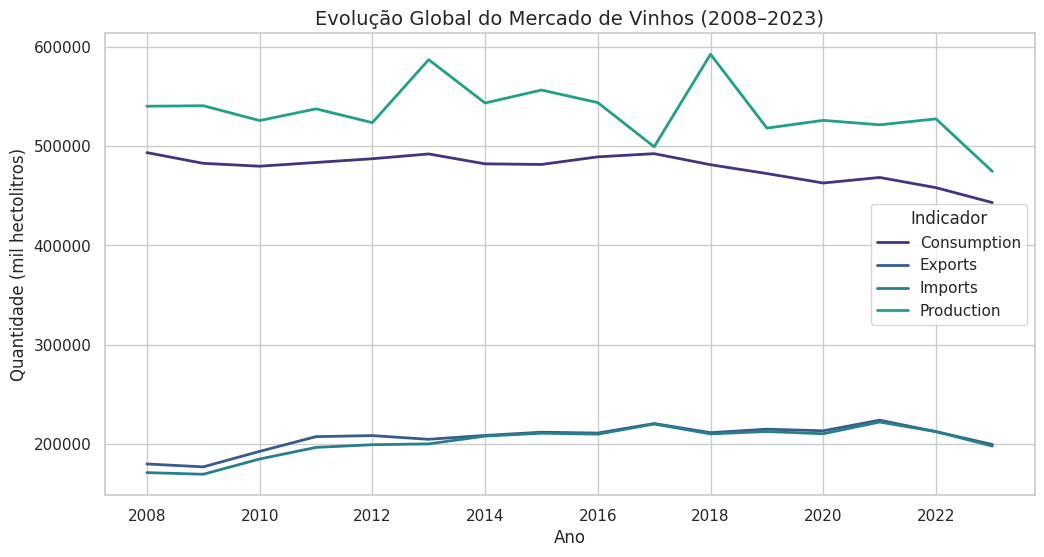

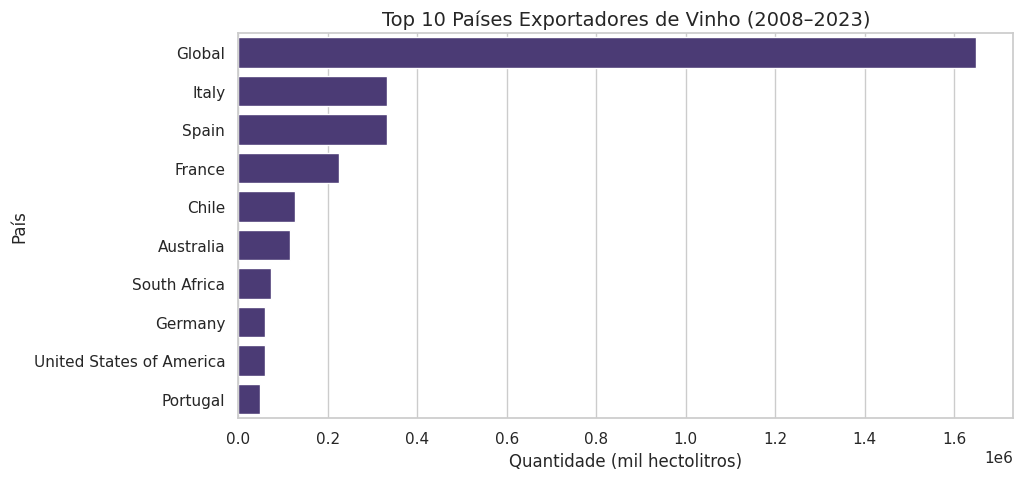

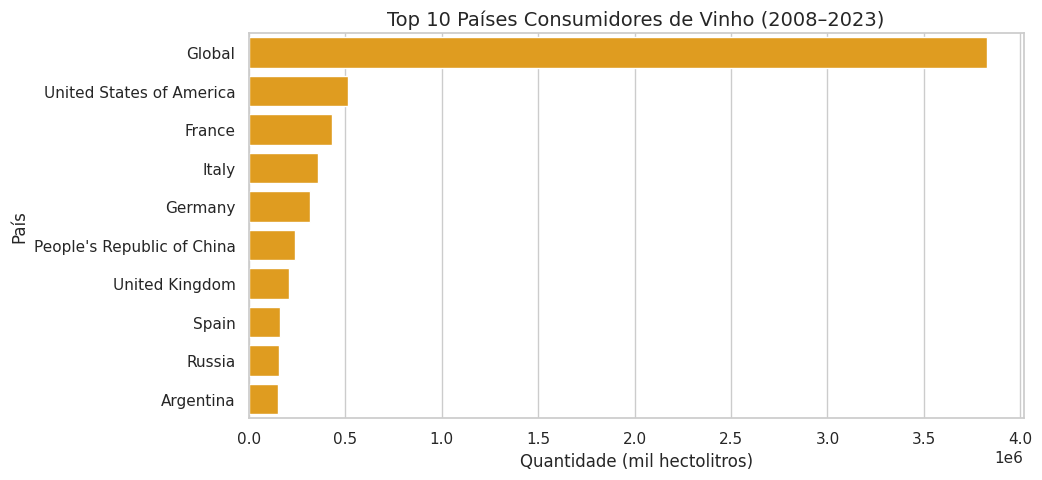

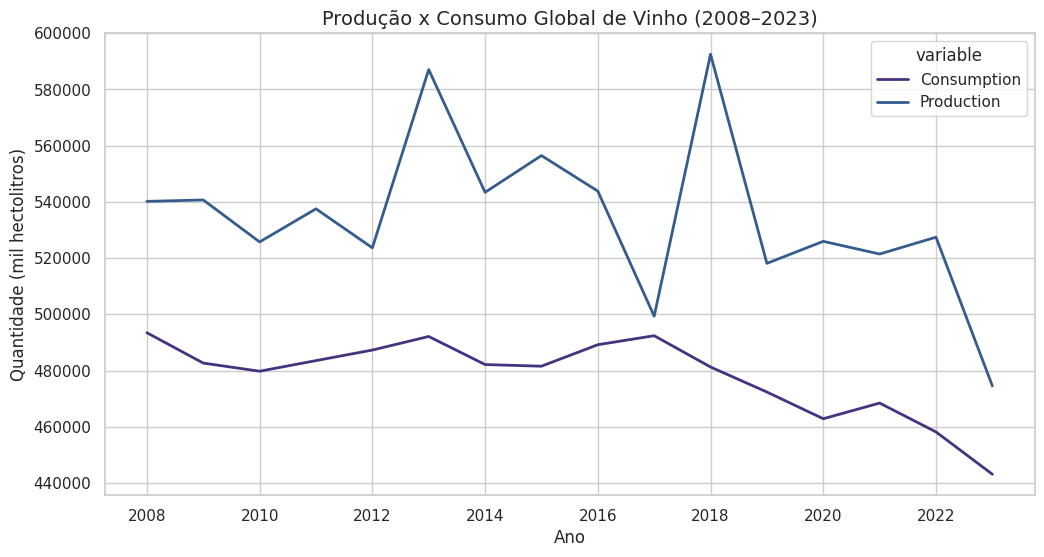

📈 Totais globais (2008–2023):
variable
Production     8558301.0
Consumption    7650653.0
Exports        3298476.0
Imports        3236664.0
Name: quantity, dtype: float64

📊 Médias anuais globais:
variable
Consumption    2414.98
Exports        1304.78
Imports         991.32
Production     2538.05
Name: quantity, dtype: float64


In [3]:
# ------------------------------------------------------------
# ETAPA 3 — Análise Descritiva e Exploratória Global
# ------------------------------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns

# Ajuste de estilo
sns.set(style="whitegrid", palette="viridis")

# 1️⃣ Evolução global (média total de cada variável por ano)
df_global = df.groupby(['year', 'variable'])['quantity'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=df_global, x='year', y='quantity', hue='variable', linewidth=2)
plt.title('Evolução Global do Mercado de Vinhos (2008–2023)', fontsize=14)
plt.xlabel('Ano')
plt.ylabel('Quantidade (mil hectolitros)')
plt.legend(title='Indicador')
plt.show()

# 2️⃣ Top 10 países exportadores (média total no período)
df_exports = df[df['variable'] == 'Exports']
top_exports = df_exports.groupby('region_country')['quantity'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=top_exports, x='quantity', y='region_country')
plt.title('Top 10 Países Exportadores de Vinho (2008–2023)', fontsize=14)
plt.xlabel('Quantidade (mil hectolitros)')
plt.ylabel('País')
plt.show()

# 3️⃣ Top 10 países consumidores
df_consumption = df[df['variable'] == 'Consumption']
top_consumption = df_consumption.groupby('region_country')['quantity'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=top_consumption, x='quantity', y='region_country', color='orange')
plt.title('Top 10 Países Consumidores de Vinho (2008–2023)', fontsize=14)
plt.xlabel('Quantidade (mil hectolitros)')
plt.ylabel('País')
plt.show()

# 4️⃣ Produção vs Consumo global (comparativo resumido)
df_comp = df[df['variable'].isin(['Production', 'Consumption'])].groupby(['year', 'variable'])['quantity'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=df_comp, x='year', y='quantity', hue='variable', linewidth=2)
plt.title('Produção x Consumo Global de Vinho (2008–2023)', fontsize=14)
plt.xlabel('Ano')
plt.ylabel('Quantidade (mil hectolitros)')
plt.show()

# 5️⃣ Indicadores gerais (médias e totais)
print("📈 Totais globais (2008–2023):")
print(df.groupby('variable')['quantity'].sum().sort_values(ascending=False))

print("\n📊 Médias anuais globais:")
print(df.groupby('variable')['quantity'].mean().round(2))